# Assignment 1: Predicting Employee Attrition with Random Forests

Execute cells **top to bottom**. Where you see `# TODO`, add your code.

**Data:** `data/IBM_HR_Employee_Attrition.csv`

**Deliverables produced in this file:**
- Baseline Decision Tree metrics (accuracy, precision, recall)
- Random Forest metrics + side-by-side comparison table
- Feature importance visualization
- Markdown sections for **Key Drivers of Attrition** and **Reflection**

### Download Dependencies
Run this cell once to install all dependencies. These can also be run directly in the terminal if you prefer.


In [16]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
print("Importing required libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("✓ All libraries imported successfully!\n")

Importing required libraries...
✓ All libraries imported successfully!



### Step 1: Load the dataset
----------------------------------------------------------------------------
Confirm the CSV can be read and preview the first rows. The following code should output the first 5 rows of the IBM HR data.

In [18]:
# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
print("Loading employee attrition dataset...")
df = pd.read_csv(r'C:\Users\flana\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("✓ Dataset loaded successfully!\n")

# Display first few rows to verify load
print("First 5 rows of the dataset:")
print(df.head())

# Display basic info about the dataset
print("\nDataset Information:")
print(df.info())

print("\n" + "="*80)
print("CHECKPOINT: Verify that the dataset loaded correctly and you can see column names")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("="*80 + "\n")

Loading employee attrition dataset...
✓ Dataset loaded successfully!

First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical           

### Step 2: Explore and Prepare the Dataset
----------------------------------------------------------------------------
Perform the same kind of exploratory analysis real data scientists do before building a model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

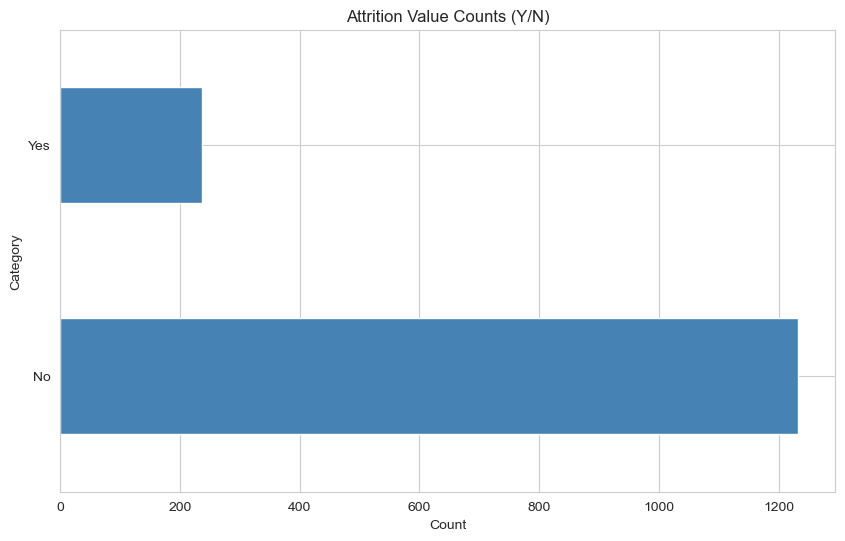


CHECKPOINT: X_cleaned should have all numeric columns, y should contain Attrition values
X_cleaned shape: (1470, 34)
y shape: (1470,)



In [46]:
# Display summary statistics
# TODO: Use df.describe() and df.info() to generate summary statistics for numeric features
df.describe()
df.info()

# Plot attrition counts to see class imbalance
# TODO: Use df['Attrition'].value_counts() and create a visualization using matplotlib to see how imbalanced the dataset is

attrition = df['Attrition'].value_counts()

plt.figure(figsize=(10,6))
attrition.plot(kind='barh', color='steelblue')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Attrition Value Counts (Y/N)')
plt.show()

# Encode categorical variables
# TODO: Use pd.get_dummies() to encode categorical variables
# Store the result in a variable (you'll need this for the next step)

df_encoded = pd.get_dummies(df)

# Split features (X) from target (y)
# TODO: Create X_cleaned with all columns except 'Attrition'
X = pd.get_dummies(df.drop('Attrition', axis=1))

# TODO: Create y with just the 'Attrition' column
y = df['Attrition'].map({'Yes': 1, 'No': 0})


print("\n" + "="*80)
print("CHECKPOINT: X_cleaned should have all numeric columns, y should contain Attrition values")
print(f"X_cleaned shape: {X_cleaned.shape if X_cleaned is not None else 'Not yet defined'}")
print(f"y shape: {y.shape if y is not None else 'Not yet defined'}")
print("="*80 + "\n")

### Step 3: Train a Baseline Decision Tree Model
----------------------------------------------------------------------------
Build a baseline decision tree for comparison

In [50]:
# Split data into training and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42, stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2, random_state = 42, stratify = y
)

if 'ID' in X.columns:
    X = X.drop('ID', axis=1)

# Train a decision tree classifier
# TODO: Initialize DecisionTreeClassifier(random_state=42)
dt_model = DecisionTreeClassifier(
    random_state = 42,
    class_weight = 'balanced'
)

# TODO: Fit the model on training data
dt_model.fit(X_train, y_train)

# Make predictions on test set
# TODO: Use dt_model.predict() on X_test
dt_predictions = dt_model.predict(X_test)  # Replace with predictions

# Calculate evaluation metrics
# TODO: Calculate accuracy, precision, and recall for the decision tree
dt_accuracy = round(accuracy_score(y_test, dt_predictions), 4)  # Replace with accuracy_score()
dt_precision = round(precision_score(y_test, dt_predictions), 4)  # Replace with precision_score()
dt_recall = round(recall_score(y_test, dt_predictions), 4)  # Replace with recall_score()

# Print results
print("\n" + "="*80)
print("BASELINE DECISION TREE RESULTS")
print("="*80)
# TODO: Print accuracy, precision, and recall with clear labels
print(f"Accuracy: {dt_accuracy if dt_accuracy is not None else 'Not yet calculated'}")
print(f"Precision: {dt_precision if dt_precision is not None else 'Not yet calculated'}")
print(f"Recall: {dt_recall if dt_recall is not None else 'Not yet calculated'}")
print("="*80 + "\n")


BASELINE DECISION TREE RESULTS
Accuracy: 0.7959
Precision: 0.3556
Recall: 0.3404



### Step 4: Build and Evaluate a Random Forest Model
----------------------------------------------------------------------------
Move beyond a single tree to a more powerful ensemble model

In [55]:
# Move beyond a single tree to a more powerful ensemble model

# Train a random forest classifier
# TODO: Initialize and train a RandomForestClassifier with these parameters:
# n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=2,
# max_features='sqrt', class_weight='balanced', random_state=42
rf_model = RandomForestClassifier(
    random_state = 42,
    n_estimators = 200,
    max_depth = None,
    min_samples_split = 10, 
    min_samples_leaf = 2,
    max_features = 'sqrt',
    class_weight = 'balanced'
)

rf_model.fit(X_train, y_train)
# Make predictions using probability threshold
# TODO: Use rf_model.predict_proba() to get probabilities for the positive class
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
# TODO: Apply a threshold of 0.35 to convert probabilities to predictions
rf_predictions = (rf_probabilities >= .35).astype(int)

# Calculate evaluation metrics
# TODO: Calculate accuracy, precision, and recall for the random forest
rf_accuracy = round(accuracy_score(y_test, rf_predictions), 4)
rf_precision = round(precision_score(y_test, rf_predictions), 4)
rf_recall = round(recall_score(y_test, rf_predictions), 4)

# Print results
print("\n" + "="*80)
print("RANDOM FOREST RESULTS")
print("="*80)
print(f"Accuracy: {rf_accuracy if rf_accuracy is not None else 'Not yet calculated'}")
print(f"Precision: {rf_precision if rf_precision is not None else 'Not yet calculated'}")
print(f"Recall: {rf_recall if rf_recall is not None else 'Not yet calculated'}")
print("="*80 + "\n")

# Create comparison table
# TODO: Create a pandas DataFrame comparing both models side-by-side
# Columns: Model, Accuracy, Precision, Recall
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'Precision': [dt_precision, rf_precision],
    'Recall': [dt_recall, rf_recall]
})

# TODO: Display the comparison table
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(model_comparison.to_string(index=False))
print("="*80 + "\n")


RANDOM FOREST RESULTS
Accuracy: 0.7993
Precision: 0.4091
Recall: 0.5745


MODEL COMPARISON
        Model  Accuracy  Precision  Recall
Decision Tree    0.7959     0.3556  0.3404
Random Forest    0.7993     0.4091  0.5745



### Step 5: Interpret Feature Importances
----------------------------------------------------------------------------
Turn model results into actionable insights for HR

MonthlyIncome           0.072587
Age                     0.059426
TotalWorkingYears       0.054549
YearsAtCompany          0.048597
DailyRate               0.042579
EmployeeNumber          0.041100
YearsWithCurrManager    0.040712
OverTime_No             0.038873
DistanceFromHome        0.037845
OverTime_Yes            0.036345
dtype: float64

KEY DRIVERS OF ATTRITION


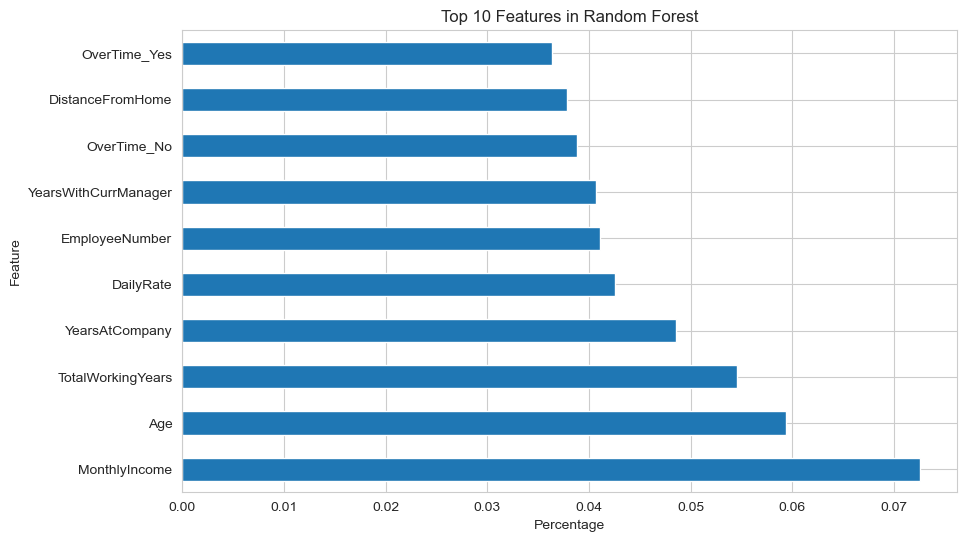

In [61]:
# Extract feature importances
# TODO: Get feature_importances_ from rf_model and create a pandas Series
# with feature names as index
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index = X_train.columns
).sort_values(ascending=False)

# TODO: Get top 10 most important features
top_10_features = feature_importances.head(10)
print(top_10_features)

# Visualize top 10 feature importances
# TODO: Create a horizontal bar plot of the top 10 features
# Use plt.barh() or top_10_features.plot(kind='barh')
plt.figure(figsize=(10,6))

top_10_features.plot(kind='barh')
plt.xlabel('Percentage')
plt.ylabel('Feature')
plt.title('Top 10 Features in Random Forest')

print("\n" + "="*80)
print("KEY DRIVERS OF ATTRITION")
print("="*80)

#### Key Drivers of Attrition
Write 3-5 bullet points explaining what the top factors reveal. Include at least one actionable takeaway for HR
- Monthly Income is the highest predictor of attrition (but only sits at just over 7%). From the perspective of lower incomes, employees are more likely to leave or quit if their monthly income is lower. The lower chance with high income is that employees are burnt out and do not continue their job, but the first option is much more likely.
- Age is the second highest predictor at just under 6%. The context for this is that as employees get older, they are closer to retirement. Since retirement falls under the blanket of attrition, an aging employee meets this designation and there is nothing a company can necessarily do to stop/avoid it.
- Total working years and years at company are two features that fall in the top four. They are closely related and effect attrition because as someone works at a company for an increasing amount of years, they will become more valuable. As this continues, they will eventually leave in some capacity and in the context of attrition, will not be replaced.
- In the context of attrition for HR, the way to combat this is to offer competitive salaries to entice employees to stay. For age, working years, and years at company, there is not anything HR can do about that because when someone works and is good at their job, these outcomes are inevitable. The goal for HR would be to slim down on the monthly income numbers for attrition, and that would start with increasing salaries by a responsible margin. 

### Step 6: Reflection (150-200 words)
----------------------------------------------------------------------------
Write a 150-200 word reflection addressing:
- How the random forest improved upon the decision tree baseline
- When ensemble methods are worth the added complexity
- How these modeling skills connect to your final project

Given the model comparison, it can be said that the best improvement from the decision tree to the random forest was in recall. This increase was 23.41%. This means that the forest model improved its ability to identify employees who left the company while qualifying them correctly as attrition cases. Recall increased from 34.04% to 57.45%. The improvements in accuracy (correctly predicting employees) and precision (percent correct when predicting attrition) are almost unnoticeable for accuracy and minimal for precision. The biggest and most important improvement was in recall. This is the most important metric because you want to identify who will actually qualify as attrition and what attributes are associated with them. If there are multiple instances that can be improved upon, that data becomes available for action.

Ensemble models are worth the added complexity when the dataset contains many observations and variables. There are many situations where a simple approach may not capture the full structure of the data. Viewing the data from multiple perspectives reduces the “greediness” of individual trees (as the course resources describe). Ensemble models address this by averaging across many trees, which reduces the possibility of error. It is a strong form of normalization and reminds me of Markov chains with different time steps. Each tree can be thought of as a time step, and instead of a single tree acting as the final normalization, the average of all trees becomes the normalization, which forms the forest.

In Week 11 of this class, it states that the goal of the final project is to complete a machine learning solution to a business problem using a dataset of my choice. These skills connect directly to my final project because the concept, and likely application, of random forests will play a significant role in both the process and the final outcome of whatever project I choose.

### Step 7: Push to GitHub
----------------------------------------------------------------------------
Once complete, save and push your work:
1. Save this file
2. Run in terminal:
```sh
git add .
git commit -m 'completed employee attrition assignment'
git push
```